In [1]:
import numpy as np
from signal_processing_utilities import process_signal
from glob import glob
from scipy.signal import lfilter, butter
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import time

plt.style.use("ggplot")
import scipy

In [2]:
data_dir = "../../data/"
data_dir_l = glob(data_dir + "*.wav")
current_file = data_dir_l[0]
current_file

'../../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav'

In [3]:
sample_rate, data = wavfile.read(current_file)

In [4]:
data_df = pd.DataFrame(data)
data_df.columns = ["Amplitude"]

In [5]:
preprocessed_signal = process_signal.preprocess_signal(
    raw_neural_signal=data, sample_rate=sample_rate
)

In [6]:
preprocessed_signal_df = pd.DataFrame(preprocessed_signal, columns=["Amplitude"])

### Comparing the unique values of the Amplitudes


In [7]:
len(np.unique(data_df))

158

In [8]:
len(data_df)

98699

In [9]:
unique_amplitudes = pd.DataFrame(np.unique(data_df))

In [10]:
unique_amplitudes_index_l = []

for index in range(0, len(data_df)):
    unique_amplitudes_index_l.append(
        unique_amplitudes.index[unique_amplitudes[0] == data_df["Amplitude"][index]][0]
    )

In [11]:
data_df["unique_amplitudes_index_l"] = np.array(unique_amplitudes_index_l)

<Axes: >

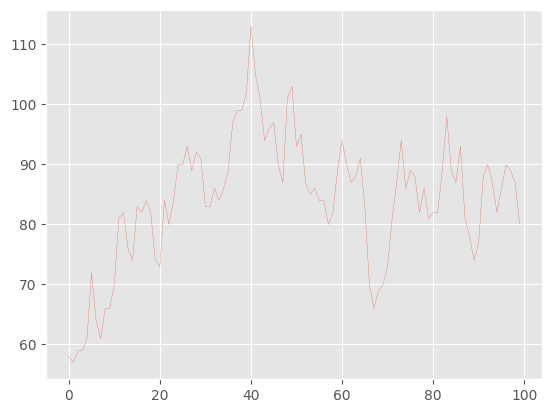

In [12]:
data_df["unique_amplitudes_index_l"][0:100].plot(linewidth=0.2)

In [13]:
residual_l = []
for index, current_value in enumerate(data_df["unique_amplitudes_index_l"]):
    if index == 0:
        prev_value = current_value
        residual_l.append(0)
        continue
    residual_l.append(current_value - prev_value)
    prev_value = current_value

In [14]:
data_df["uniq_amplitudes_index_residuals"] = residual_l

In [15]:
np.unique(data_df["uniq_amplitudes_index_residuals"])

array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,
        30,  32])

In [16]:
np.unique(data_df["Amplitude"])

array([-4132, -4068, -3940, -3876, -3812, -3748, -3684, -3619, -3555,
       -3491, -3427, -3363, -3299, -3235, -3171, -3107, -3043, -2979,
       -2915, -2851, -2787, -2723, -2659, -2594, -2530, -2466, -2402,
       -2338, -2274, -2210, -2146, -2082, -2018, -1954, -1890, -1826,
       -1762, -1698, -1634, -1570, -1505, -1441, -1377, -1313, -1249,
       -1185, -1121, -1057,  -993,  -929,  -865,  -801,  -737,  -673,
        -609,  -545,  -480,  -416,  -352,  -288,  -224,  -160,   -96,
          31,    95,   159,   223,   287,   351,   415,   479,   544,
         608,   672,   736,   800,   864,   928,   992,  1056,  1120,
        1184,  1248,  1312,  1376,  1440,  1504,  1569,  1633,  1697,
        1761,  1825,  1889,  1953,  2017,  2081,  2145,  2209,  2273,
        2337,  2401,  2465,  2529,  2593,  2658,  2722,  2786,  2850,
        2914,  2978,  3042,  3106,  3170,  3234,  3298,  3362,  3426,
        3490,  3554,  3618,  3683,  3747,  3811,  3875,  3939,  4003,
        4067,  4131,

<Axes: >

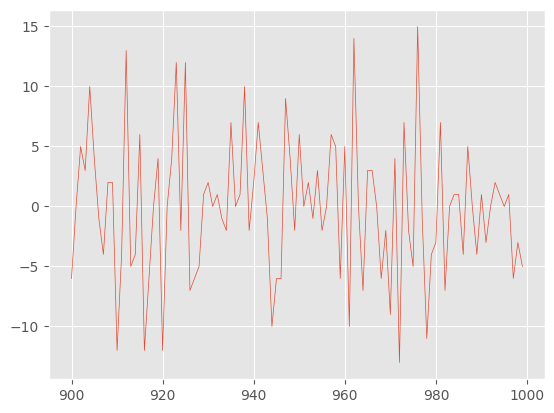

In [17]:
data_df["uniq_amplitudes_index_residuals"][900:1000].plot(linewidth=0.5)

In [18]:
len(np.unique(data_df["Amplitude"]))

158

In [19]:
(len(data_df) + 158 * 2) / (len(data_df) * 2) * 100

50.16008267560969

In [20]:
data_df["Amplitude"][0].dtype

dtype('int16')

<Axes: >

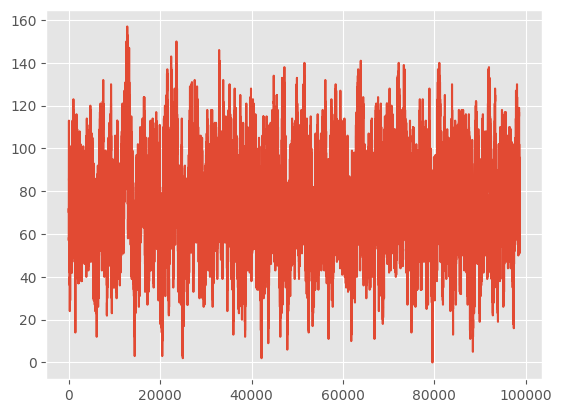

In [21]:
data_df["unique_amplitudes_index_l"].plot()

In [63]:
unique_amplitudes[0]

(158,)

In [52]:
data_df.shape

(98699, 1)

<Axes: >

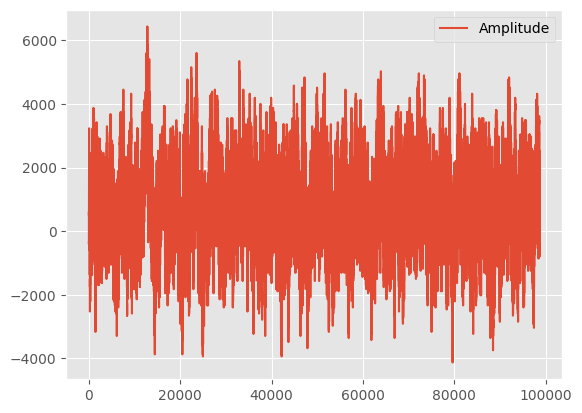

In [15]:
data_df.plot()

In [140]:
uniq_amplitudes_index_residuals_value_l = data_df[
    "uniq_amplitudes_index_residuals"
].values

In [145]:
str(uniq_amplitudes_index_residuals_value_l)

'[ 0 -1  2 ...  9 -1 -7]'

In [150]:
with open("data/uniq_amplitudes_index_residuals.txt", "w+") as fp:
    for value in uniq_amplitudes_index_residuals_value_l:
        fp.write(str(value))
        fp.write("\n")
    fp.close()

### Defining algorithm to reduce size of data using uint8 & unique dictionary set


In [152]:
unique_amplitudes_index_l = np.unique(data_df["Amplitude"])

array([-4132, -4068, -3940, -3876, -3812, -3748, -3684, -3619, -3555,
       -3491, -3427, -3363, -3299, -3235, -3171, -3107, -3043, -2979,
       -2915, -2851, -2787, -2723, -2659, -2594, -2530, -2466, -2402,
       -2338, -2274, -2210, -2146, -2082, -2018, -1954, -1890, -1826,
       -1762, -1698, -1634, -1570, -1505, -1441, -1377, -1313, -1249,
       -1185, -1121, -1057,  -993,  -929,  -865,  -801,  -737,  -673,
        -609,  -545,  -480,  -416,  -352,  -288,  -224,  -160,   -96,
          31,    95,   159,   223,   287,   351,   415,   479,   544,
         608,   672,   736,   800,   864,   928,   992,  1056,  1120,
        1184,  1248,  1312,  1376,  1440,  1504,  1569,  1633,  1697,
        1761,  1825,  1889,  1953,  2017,  2081,  2145,  2209,  2273,
        2337,  2401,  2465,  2529,  2593,  2658,  2722,  2786,  2850,
        2914,  2978,  3042,  3106,  3170,  3234,  3298,  3362,  3426,
        3490,  3554,  3618,  3683,  3747,  3811,  3875,  3939,  4003,
        4067,  4131,

In [198]:
unique_amplitudes_index_l = []

for index in range(0, len(data_df)):
    unique_amplitudes_index_l.append(
        unique_amplitudes.index[unique_amplitudes[0] == data_df["Amplitude"][index]][0]
    )

indices_uint8 = np.array(data_df["unique_amplitudes_index_l"].values, dtype=np.uint8)

In [172]:
indices_uint8 = np.array(data_df["unique_amplitudes_index_l"].values, dtype=np.uint8)

In [173]:
indices_uint8

array([58, 57, 59, ..., 67, 66, 59], dtype=uint8)

## Plotting


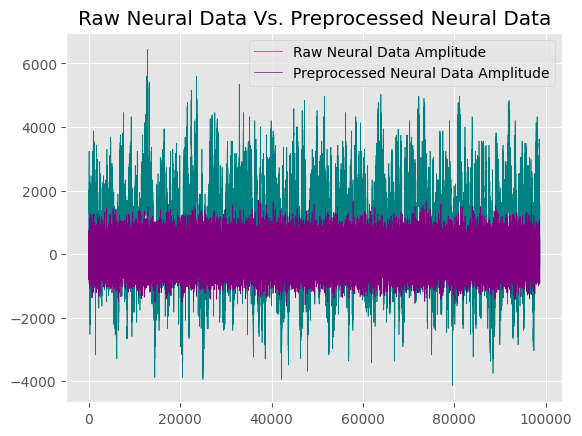

In [7]:
plt.plot(data_df, linewidth=0.5, color="teal", label=["Raw Neural Data Amplitude"])
plt.plot(
    preprocessed_signal,
    linewidth=0.5,
    color="purple",
    label=["Preprocessed Neural Data Amplitude"],
)
plt.legend()
plt.grid(True)
plt.title("Raw Neural Data Vs. Preprocessed Neural Data")
plt.show()

## Preprocessed Signal


In [8]:
raw_neural_signal = data_df["Amplitude"].values

In [13]:
# Detrending the signal
start_time = time.time_ns()
detrended_neural_data = np.int16(scipy.signal.detrend(raw_neural_signal))
stop_time = time.time_ns()
process_signal.print_time_each_function_takes_to_complete_processing(
    start_time=start_time, stop_time=stop_time, executed_line="scipy.signal.detrend("
)


Executed Line: scipy.signal.detrend(...
Time Δ Nanoseconds: 8166000
Time Δ Microseconds: 8166.0
Time Δ Milliseconds: 8.166
Time Δ Seconds: 0.008166




In [14]:
# Band-pass Filter
start_time = time.time_ns()
nyq = sample_rate // 2
low_cutoff_freq = 500
high_cutoff_freq = 5000
low = low_cutoff_freq / nyq
high = high_cutoff_freq / nyq
order = 4
numerator, denominator = butter(order, [low, high], btype="band")

filtered_data_bandpass = np.int16(
    lfilter(numerator, denominator, detrended_neural_data)
)
stop_time = time.time_ns()
process_signal.print_time_each_function_takes_to_complete_processing(
    start_time=start_time,
    stop_time=stop_time,
    executed_line="Filtering: creating bandpass filter & using lfilter",
)


Executed Line: Filtering: creating bandpass filter & using lfilter...
Time Δ Nanoseconds: 38045000
Time Δ Microseconds: 38045.0
Time Δ Milliseconds: 38.045
Time Δ Seconds: 0.038045




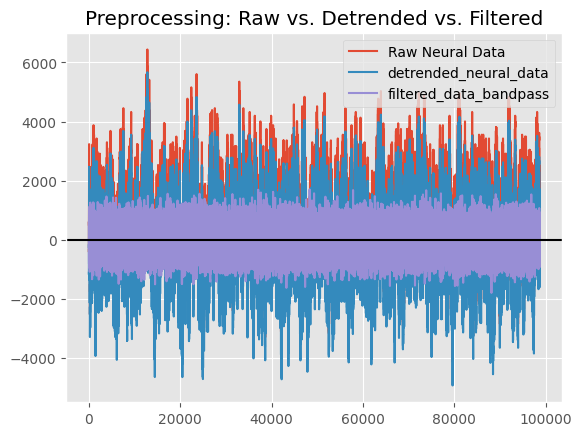

In [11]:
plt.title("Preprocessing: Raw vs. Detrended vs. Filtered")
plt.plot(data_df, label="Raw Neural Data")
plt.plot(detrended_neural_data, label="detrended_neural_data")
plt.plot(filtered_data_bandpass, label="filtered_data_bandpass")
plt.axhline(y=0, color="black")
plt.legend()
plt.show()